In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [6]:
img_width = 180
img_height =180 

In [7]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [8]:
data_cat = data_train.class_names

In [9]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [10]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [11]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


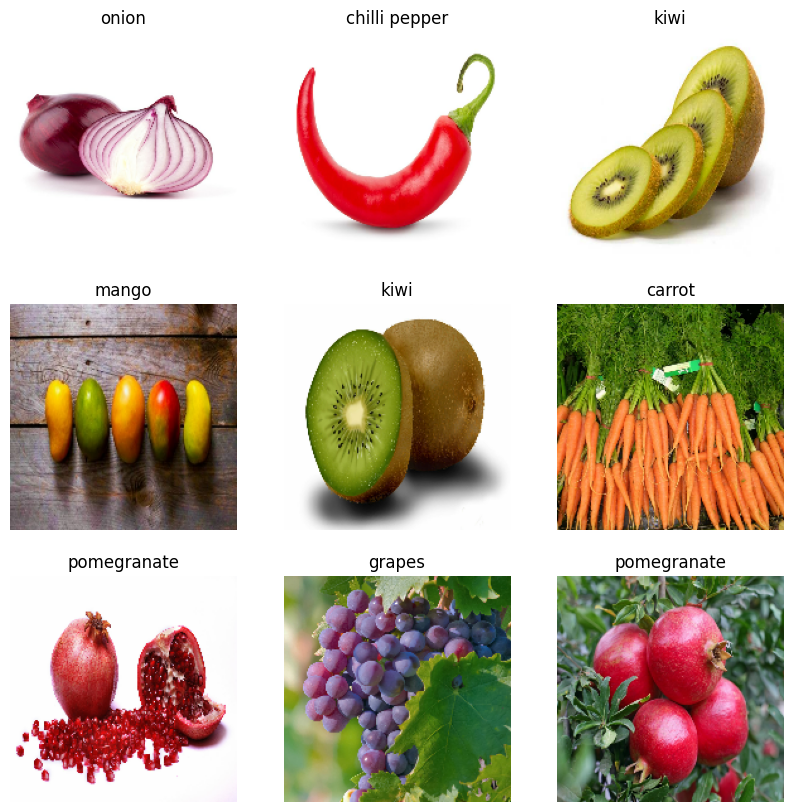

In [12]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [13]:
from tensorflow.keras.models import Sequential

In [14]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [15]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [16]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [17]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 64s 631ms/step - accuracy: 0.0564 - loss: 3.7860 - val_accuracy: 0.2621 - val_loss: 2.5005
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 47s 482ms/step - accuracy: 0.2387 - loss: 2.5925 - val_accuracy: 0.5071 - val_loss: 1.7317
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 45s 459ms/step - accuracy: 0.3994 - loss: 2.0602 - val_accuracy: 0.6752 - val_loss: 1.2229
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 43s 433ms/step - accuracy: 0.5245 - loss: 1.6226 - val_accuracy: 0.8091 - val_loss: 0.7661
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 46s 470ms/step - accuracy: 0.6820 - loss: 1.0595 - val_accuracy: 0.8718 - val_loss: 0.5357
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 42s 425ms/step - accuracy: 0.8254 - loss: 0.6341 - val_accuracy: 0.9316 - val_loss: 0.3413
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 43s 433ms/step - accuracy: 0.8698 - loss: 0.4536 - val_accuracy: 0.9316 - val_loss: 0.3424
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 42s 431ms/step - accuracy: 0.9053 - loss: 0.3721 - val_accu

Text(0.5, 1.0, 'Loss')

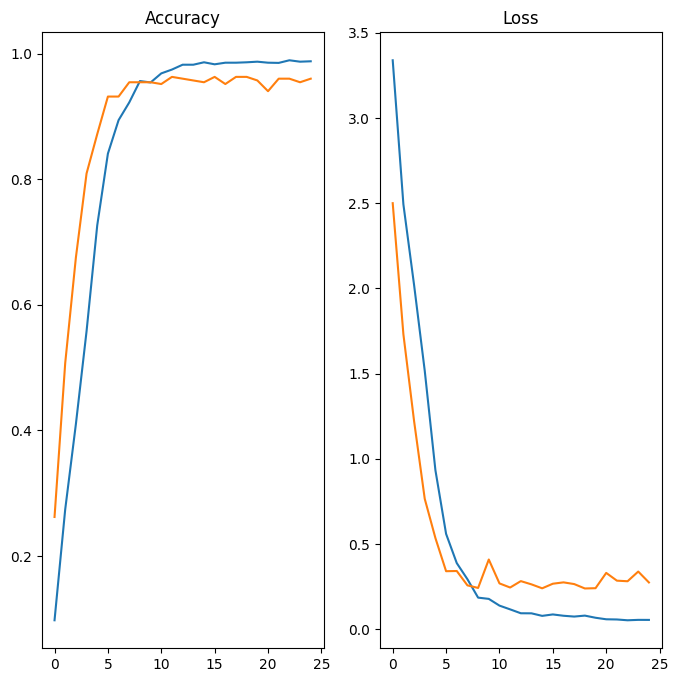

In [18]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [1]:
image = 'corn.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

NameError: name 'tf' is not defined

In [20]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


In [21]:
score = tf.nn.softmax(predict)

In [22]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is corn with accuracy of 99.19


In [23]:
model.save('Image_classify.keras')